In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data assimilation - Multivariate PDF


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def plotGauss3D(mean_0,mean_1,sd_0,sd_1,rho,vminmax=None,title=None):
# size of grid
    N = 1000
#  generate grid (NB -1 to 1)
    coords = 2. * (np.arange(N+1)/float(N) - 0.5)
    x0, x1 = np.meshgrid(coords,coords)
    x = np.array([x0, x1])
    dx = np.array([x0[0,1] - x0[0,0], x1[1,0] - x1[0,0]])
    grid = dx[0] * dx[1]

    # set B
    b01 = b10 = rho * sd_0 * sd_1
    b00 = sd_0**2
    b11 = sd_1**2
    B = np.matrix([[b00,b01],[b10,b11]])
    # set xb: the mean
    xb = np.array([mean_0,mean_1])

    xxb = np.zeros_like(x)
    for i in range(xb.shape[0]): xxb[i,...] = xb[i]
    e = x - xxb

    n = np.shape(B)[0]
    # inverse of B
    BI = B.I
    # scaling term
    scale_1 = (2.*np.pi)**(n/2) * np.sqrt(np.linalg.det(B))
    gauss = np.exp(-0.5 * ((e[0,...] * BI[0,0] + e[1,...] * BI[0,1])* e[0,...]     \
                          + (e[0,...] * BI[1,0] + e[1,...] * BI[1,1])* e[1,...])) \
                          / scale_1

    # check integral
    #print ('integral of Gaussian:',gauss.sum() * grid)

    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(x0, x1, gauss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-.0, 5.0)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if title:
        plt.title(title)
    plt.show()   
        
  

## Plot the Multivariate Gaussian Distribution

$P_b(x) = \frac{1}{(2 \pi)^\frac{n}{2} \sqrt{\det(B)}} \exp \left( - \frac{1}{2} (x_b - x)^T B^{-1} (x_b - x) \right)$

A dimensional example with 
$x_b = (0.2,0.5)$; $\sigma_b = (0.3,0.2)$; $\rho=-0.5$

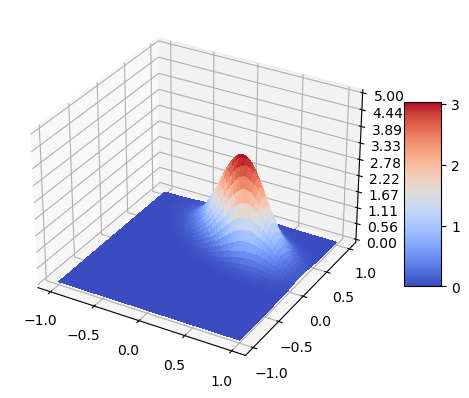

In [3]:
xb = [0.2,0.5]
sb = [0.3,0.2]
rho = -0.5
plotGauss3D(xb[0],xb[1],sb[0],sb[1],rho)